# Naive Bayes

Naive Bayes (NB) is ‘naive’ because it makes the assumption that features of a measurement are independent of each other. This is naive because it is (almost) never true, nevertheless, the approach performs surprisingly well on data where this assumption does not hold. It is simple but a powerful algorithm for predictive modeling. It is based on Bayes Theorem with an assumption of independence among predictors. Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:

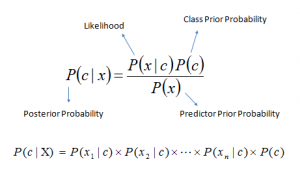


Above,

P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).

P(c) is the prior probability of class.

P(x|c) is the likelihood which is the probability of predictor given class.

P(x) is the prior probability of predictor.

Let’s understand it using an example. Below I have a training data set of weather and corresponding target variable ‘Play’ (suggesting possibilities of playing). Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.

In [19]:
# Importing libraries
import numpy as np
import pandas as pd

In [20]:
# Loading Tennis dataset
tennis = pd.read_csv(r"C:\Users\akash\Downloads\datasets_89775_207354_play_tennis (1).csv")

In [21]:
tennis.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


Now let us create a two frequency tables of all the independent attributes i.e., of outlook, temp, humidity and wind.	
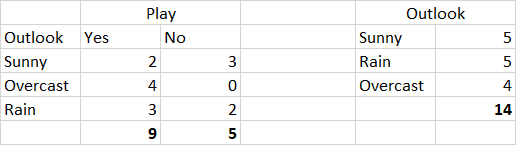
First frequency table groupes outlook on the basis of play(target attribute).
Second frequency table indicates outlook counts. Similarly, we can do it with other attributes

In [22]:
# As we discussed above we're creating the frquency tables
outlook = tennis.groupby(['outlook', 'play']).size()
outlook_total = tennis.groupby(['outlook']).size()

temp = tennis.groupby(['temp', 'play']).size()
temp_total = tennis.groupby(['temp']).size()

humidity = tennis.groupby(['humidity', 'play']).size()
humidity_total = tennis.groupby(['humidity']).size()

wind = tennis.groupby(['wind', 'play']).size()
wind_total = tennis.groupby(['wind']).size()

play = tennis['play'].value_counts()

In [23]:
print(outlook)
print('\n')
print(outlook_total)

outlook   play
Overcast  Yes     4
Rain      No      2
          Yes     3
Sunny     No      3
          Yes     2
dtype: int64


outlook
Overcast    4
Rain        5
Sunny       5
dtype: int64


Now, we have to calculate conditional probabity. The conditional probability of an event B is the probability that the event will occur given the knowledge that an event A has already occurred. Below is the equation of conditional probability.
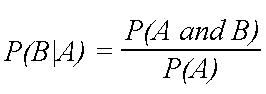



Below we calculate conditional probability of outllook table. 

Here, we calculate probability of playing when weather is sunny or there is rain our overcast.
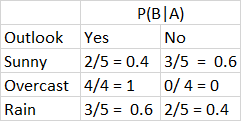
Similarly we calculate with other attribute.

In [24]:
# As discussed above for outlook attribute
p_sunny_yes = outlook['Sunny', 'Yes']/outlook_total['Sunny']
p_sunny_no = outlook['Sunny', 'No']/outlook_total['Sunny']

p_rain_yes = outlook['Rain', 'Yes']/outlook_total['Rain']
p_rain_no = outlook['Rain', 'No']/outlook_total['Rain']

p_overcast_yes = outlook['Overcast', 'Yes']/outlook_total['Overcast']
p_overcast_no = 0/outlook_total['Overcast']

In [25]:
print(p_sunny_yes)
print(p_sunny_no)

0.4
0.6


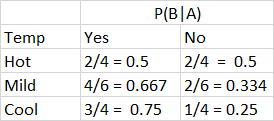

In [26]:
# For temp attribute
p_hot_yes = temp['Hot', 'Yes']/temp_total['Hot']
p_hot_no = temp['Hot', 'No']/temp_total['Hot']

p_mild_yes = temp['Mild', 'Yes']/temp_total['Mild']
p_mild_no = temp['Mild', 'No']/temp_total['Mild']

p_cool_yes = temp['Cool', 'Yes']/temp_total['Cool']
p_cool_no = temp['Cool', 'No']/temp_total['Cool']

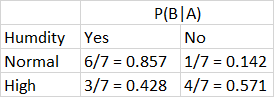

In [27]:
p_normal_yes = humidity['Normal', 'Yes']/humidity_total['Normal']
p_normal_no = humidity['Normal', 'No']/humidity_total['Normal']
p_high_yes = humidity['High', 'Yes']/humidity_total['High']
p_high_no = humidity['High', 'No']/humidity_total['High']

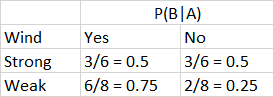

In [28]:
p_strong_yes = wind['Strong', 'Yes']/wind_total['Strong']
p_strong_no = wind['Strong', 'No']/wind_total['Strong']
p_weak_yes = wind['Weak', 'Yes']/wind_total['Weak']
p_weak_no = wind['Weak', 'No']/wind_total['Weak']

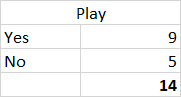

In [29]:
# Here we calculate probability of Yes or No
p_yes = play['Yes']/(play['Yes']+play['No'])
p_no = 1 - p_yes

Now, everything is sorted let us apply Bayes theorem

P(c|x) = p(x1|c) x p(x2|c) x p(x2|c) x .... x p(c)

In [30]:
'''
Outlook: Sunny
Temperature: Cool
Humidity: Normal
Wind: Strong
'''
# Predicting that there will be a game on above weather conditions 
prob_yes = p_sunny_yes*p_cool_yes*p_normal_yes*p_strong_yes*p_yes
prob_no = p_sunny_no*p_cool_no*p_normal_no*p_strong_no*p_no
if prob_yes>prob_no:
    print('Game is On')
else:
    print('No Game')
    
'''
outlook: Overcast
temp: Hot
humidity: Normal
wind: Weak
'''
prob_yes = p_overcast_yes*p_hot_yes*p_normal_yes*p_weak_yes*p_yes
prob_no = p_overcast_no*p_hot_no*p_normal_no*p_weak_no*p_no
# If the probabilty of playing is greater then probability the game will be played else not.
if prob_yes>prob_no:
    print('Game is On')
else:
    print('No Game')


Game is On
Game is On
